In [14]:
# DEFINES
import pandas as pd
import pandas_profiling 
import numpy as np
from sklearn import datasets, svm, metrics
import seaborn as sns
import statistics

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]

In [29]:
fileUrl_ru = 'ru_universities_about_page_readability.csv'
df_ru = pd.read_csv(fileUrl_ru, sep=',')
df_ru.drop(['custom__region'], axis=1, inplace=True)
df_ru.head(3)

,title,custom__category,base_url,custom__name_en,custom__unirank,custom__forbes_rank,page__about_ru,page__about_en,district,readability_ru,readability_en
0,Московский государственный университет им. М. ...,общий,https://www.msu.ru/,Lomonosov Moscow State University,1.0,2.0,https://www.msu.ru/info/history5.html#nachalo,https://www.msu.ru/en/info/history5.html,NaN,"\n{\n ""c_share"": 62.04620462046205,\n ""a...","{\r\n ""c_share"": 25.22031053294167,\r\n ..."
1,"Национальный исследовательский университет ""Вы...",гуманитарный,https://www.hse.ru/,National Research University Higher School of ...,2.0,1.0,https://www.hse.ru/info/,https://www.hse.ru/en/info/,NaN,"{\r\n ""c_share"": 58.22784810126582,\r\n ...","{\r\n ""c_share"": 31.01851851851852,\r\n ..."
2,Санкт-Петербургский государственный университет,общий,https://spbu.ru/,St. Petersburg State University,3.0,9.0,https://spbu.ru/history,https://english.spbu.ru/our-university/about-s...,NaN,NaN,NaN


In [30]:
fileUrl_sites = 'russian_universities_with_rating_and_manual.csv'
df_sites = pd.read_csv(fileUrl_sites, sep=',')
df_sites.head(3)

,title,custom__category,base_url,custom__name_en,custom__unirank,custom__forbes_rank,custom__raex_rank,custom__qs_rank,custom__the_rank,custom__city,custom__region,page__1,page__2,page__3,site_error,vi_not_work,vi_found,vi_m_f,vi_b_f,vi_is_panel,vi_is_apply_changes,vi_is_reload,vi_is_cross_pages,vi_font_sizes,vi_color_schemes,vi_pictures_modes,vi_font_sizes_wc,vi_color_schemes_wc,vi_pictures_switch_wc,vi_line_spacing,vi_letter_spacing,vi_scroll,vi_scale_br,vi_another_content,vi_fonts_switch,site_engine,vi_source,site_lang,site_front,site_crm
0,Адыгейский государственный университет,общий,https://www.adygnet.ru/,Adyghe State University,274.0,NaN,NaN,NaN,NaN,Майкоп,1,https://www.adygnet.ru/,https://www.adygnet.ru/applicants/priemnaya-ka...,https://www.adygnet.ru/zhizn-v-agu/kampus/tsen...,NaN,NaN,1.0,1.0,0.0,1.0,1.0,0.0,1.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1c-bitrix,bitrix special-aaVersion,php,NaN,NaN
1,Алтайский Государственный Технический Универси...,общий технический,https://www.altstu.ru/,Polzunov Altai State Technical University,131.0,NaN,100.0,NaN,NaN,Барнаул,22,https://www.altstu.ru/,https://pk.altstu.ru/,https://www.altstu.ru/structure/unit/ckmr/,NaN,NaN,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Алтайский государственный университет,общий,https://www.asu.ru/,Altai State University,26.0,59.0,49.0,18.0,NaN,Барнаул,22,https://www.asu.ru/,https://abiturient.asu.ru/,https://www.asu.ru/university_life/culture/life/,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_ru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                571 non-null    object 
 1   custom__category     571 non-null    object 
 2   base_url             571 non-null    object 
 3   custom__name_en      291 non-null    object 
 4   custom__unirank      290 non-null    float64
 5   custom__forbes_rank  99 non-null     float64
 6   page__about_ru       141 non-null    object 
 7   page__about_en       140 non-null    object 
 8   district             0 non-null      float64
 9   readability_ru       128 non-null    object 
 10  readability_en       128 non-null    object 
dtypes: float64(3), object(8)
memory usage: 49.2+ KB


In [32]:
df_ru = df_ru.merge(df_sites[["base_url", "custom__region"]], left_on="base_url", right_on="base_url")
df_ru.head(3)

,title,custom__category,base_url,custom__name_en,custom__unirank,custom__forbes_rank,page__about_ru,page__about_en,district,readability_ru,readability_en,custom__region
0,Московский государственный университет им. М. ...,общий,https://www.msu.ru/,Lomonosov Moscow State University,1.0,2.0,https://www.msu.ru/info/history5.html#nachalo,https://www.msu.ru/en/info/history5.html,NaN,"\n{\n ""c_share"": 62.04620462046205,\n ""a...","{\r\n ""c_share"": 25.22031053294167,\r\n ...",77
1,"Национальный исследовательский университет ""Вы...",гуманитарный,https://www.hse.ru/,National Research University Higher School of ...,2.0,1.0,https://www.hse.ru/info/,https://www.hse.ru/en/info/,NaN,"{\r\n ""c_share"": 58.22784810126582,\r\n ...","{\r\n ""c_share"": 31.01851851851852,\r\n ...",77
2,Санкт-Петербургский государственный университет,общий,https://spbu.ru/,St. Petersburg State University,3.0,9.0,https://spbu.ru/history,https://english.spbu.ru/our-university/about-s...,NaN,NaN,NaN,78


In [33]:
df_ru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 570
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                571 non-null    object 
 1   custom__category     571 non-null    object 
 2   base_url             571 non-null    object 
 3   custom__name_en      291 non-null    object 
 4   custom__unirank      290 non-null    float64
 5   custom__forbes_rank  99 non-null     float64
 6   page__about_ru       141 non-null    object 
 7   page__about_en       140 non-null    object 
 8   district             0 non-null      float64
 9   readability_ru       128 non-null    object 
 10  readability_en       128 non-null    object 
 11  custom__region       571 non-null    int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 58.0+ KB


In [34]:
okruga = {
      0: "None",
      1: "Центральный федеральный округ",
      2: "Северо-Западный федеральный округ",
      3: "Южный федеральный округ",
      4: "Приволжский федеральный округ",
      5: "Уральский федеральный округ",
      6: "Сибирский федеральный округ",
      7: "Дальневосточный федеральный округ",
      8: "Северо-Кавказский федеральный округ",
  }

def getOkrug(regionCode):
  regionOkrugMap = {
      0: 0,
      1: 3,
      2: 4,
      3: 6,
      4: 6,
      5: 8,
      6: 8,
      7: 8,
      8: 3,
      9: 8,
      10: 2,
      11: 2,
      12: 4,
      13: 4,
      14: 7,
      15: 8,
      16: 4,
      17: 6,
      18: 4,
      19: 6,
      20: 8,
      21: 4,
      22: 6,
      23: 3,
      24: 6,
      25: 7,
      26: 8,
      27: 7,
      28: 7,
      29: 2,
      30: 3,
      31: 1,
      32: 1,
      33: 1,
      34: 3,
      35: 2,
      36: 1,
      37: 1,
      38: 6,
      39: 2,
      40: 1,
      41: 7,
      42: 6,
      43: 4,
      44: 1,
      45: 5,
      46: 1,
      47: 2,
      48: 1,
      49: 7,
      50: 1,
      51: 2,
      52: 4,
      53: 2,
      54: 6,
      55: 6,
      56: 4,
      57: 1,
      58: 4,
      59: 4,
      60: 2,
      61: 3,
      62: 1,
      63: 4,
      64: 4,
      65: 7,
      66: 5,
      67: 1,
      68: 1,
      69: 1,
      70: 6,
      71: 1,
      72: 5,
      73: 4,
      74: 5,
      75: 6,
      76: 1,
      77: 1,
      78: 2,
      79: 7,
      80: 6,
      81: 4,
      82: 3,
      83: 2,
      84: 6,
      85: 6,
      86: 5,
      87: 7,
      88: 6,
      89: 2,
      90: 1,
      92: 3,
      93: 3,
      94: 1,
      95: 8,
      96: 5,
      97: 1,
      98: 1,
      99: 1,
  }
  return regionOkrugMap[regionCode]

In [35]:
df_ru['custom__district'] = df_ru['custom__region']
df_ru['custom__district'].fillna('', inplace=True)
for idx1, ru_val in df_ru.iterrows():
  if ru_val['custom__district'] != '':
    df_ru.at[idx1, 'custom__district'] = getOkrug(ru_val['custom__district'])
df_ru.head(5)

,title,custom__category,base_url,custom__name_en,custom__unirank,custom__forbes_rank,page__about_ru,page__about_en,district,readability_ru,readability_en,custom__region,custom__district
0,Московский государственный университет им. М. ...,общий,https://www.msu.ru/,Lomonosov Moscow State University,1.0,2.0,https://www.msu.ru/info/history5.html#nachalo,https://www.msu.ru/en/info/history5.html,NaN,"\n{\n ""c_share"": 62.04620462046205,\n ""a...","{\r\n ""c_share"": 25.22031053294167,\r\n ...",77,1
1,"Национальный исследовательский университет ""Вы...",гуманитарный,https://www.hse.ru/,National Research University Higher School of ...,2.0,1.0,https://www.hse.ru/info/,https://www.hse.ru/en/info/,NaN,"{\r\n ""c_share"": 58.22784810126582,\r\n ...","{\r\n ""c_share"": 31.01851851851852,\r\n ...",77,1
2,Санкт-Петербургский государственный университет,общий,https://spbu.ru/,St. Petersburg State University,3.0,9.0,https://spbu.ru/history,https://english.spbu.ru/our-university/about-s...,NaN,NaN,NaN,78,2
3,Российская академия народного хозяйства и госу...,гуманитарный,https://www.ranepa.ru/,Russian Presidential Academy of National Econo...,4.0,18.0,https://www.ranepa.ru/ob-akademii/,https://www.ranepa.ru/eng/about-academy-ranepa...,NaN,"{\r\n ""c_share"": 58.103975535168196,\r\n ...","{\r\n ""c_share"": 29.26829268292683,\r\n ...",77,1
4,Казанский (Приволжский) федеральный университет,общий,https://kpfu.ru/,Kazan Federal University,5.0,22.0,https://kpfu.ru/about_university/istoriya-univ...,https://eng.kpfu.ru/mission-strategy/,NaN,"{\r\n ""c_share"": 69.62457337883959,\r\n ...","{\r\n ""c_share"": 26.4797507788162,\r\n ""...",16,4


In [36]:
import json

df_ru['readability_ru'].fillna('', inplace=True)
df_ru['readability_en'].fillna('', inplace=True)

for idx, row in df_ru.iterrows():
#   {
#     "c_share": 27.075812274368232,
#     "avg_slen": 21.307692307692307,
#     "avg_syl": 1.9205776173285198,
#     "n_syllabes": 532,
#     "n_words": 277,
#     "n_sentences": 13,
#     "n_complex_words": 75,
#     "n_simple_words": 202,
#     "chars": 1755,
#     "letters": 1435,
#     "spaces": 273,
#     "index_fl": 22.72682588169957,
#     "index_flk": 15.382815884476539,
#     "index_dc": 5.332132296584282,
#     "index_gf": 19.35340183282422,
#     "index_SMOG": 16.850672712058472
# }
  if row['readability_ru'] != '':
    readability_RU = row['readability_ru'].replace("\n", "")
    readability_RU_obj = json.loads(readability_RU)

    df_ru.at[idx, 'ru_c_share'] = readability_RU_obj['c_share']
    df_ru.at[idx, 'ru_n_syllabes'] = readability_RU_obj['n_syllabes']
    df_ru.at[idx, 'ru_n_words'] = readability_RU_obj['n_words']
    df_ru.at[idx, 'ru_n_sentences'] = readability_RU_obj['n_sentences']
    df_ru.at[idx, 'ru_n_complex_words'] = readability_RU_obj['n_complex_words']
    df_ru.at[idx, 'ru_avg_slen'] = readability_RU_obj['avg_slen']
    df_ru.at[idx, 'ru_avg_syl'] = readability_RU_obj['avg_syl']
    df_ru.at[idx, 'ru_index_fl'] = readability_RU_obj['index_fl']
    df_ru.at[idx, 'ru_index_flk'] = readability_RU_obj['index_flk']
    df_ru.at[idx, 'ru_index_gf'] = readability_RU_obj['index_gf']
    df_ru.at[idx, 'ru_index_SMOG'] = readability_RU_obj['index_SMOG']

  if row['readability_en'] != '':
    readability_EN = row['readability_en'].replace("\n", "")
    readability_EN_obj = json.loads(readability_EN)

    df_ru.at[idx, 'en_c_share'] = readability_EN_obj['c_share']
    df_ru.at[idx, 'en_n_syllabes'] = readability_EN_obj['n_syllabes']
    df_ru.at[idx, 'en_n_words'] = readability_EN_obj['n_words']
    df_ru.at[idx, 'en_n_sentences'] = readability_EN_obj['n_sentences']
    df_ru.at[idx, 'en_n_complex_words'] = readability_EN_obj['n_complex_words']
    df_ru.at[idx, 'en_avg_slen'] = readability_EN_obj['avg_slen']
    df_ru.at[idx, 'en_avg_syl'] = readability_EN_obj['avg_syl']
    df_ru.at[idx, 'en_index_fl'] = readability_EN_obj['index_fl']
    df_ru.at[idx, 'en_index_flk'] = readability_EN_obj['index_flk']
    df_ru.at[idx, 'en_index_dc'] = readability_EN_obj['index_dc']
    df_ru.at[idx, 'en_index_gf'] = readability_EN_obj['index_gf']
    df_ru.at[idx, 'en_index_SMOG'] = readability_EN_obj['index_SMOG']

In [37]:
df_ru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 570
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                571 non-null    object 
 1   custom__category     571 non-null    object 
 2   base_url             571 non-null    object 
 3   custom__name_en      291 non-null    object 
 4   custom__unirank      290 non-null    float64
 5   custom__forbes_rank  99 non-null     float64
 6   page__about_ru       141 non-null    object 
 7   page__about_en       140 non-null    object 
 8   district             0 non-null      float64
 9   readability_ru       571 non-null    object 
 10  readability_en       571 non-null    object 
 11  custom__region       571 non-null    int64  
 12  custom__district     571 non-null    int64  
 13  ru_c_share           128 non-null    float64
 14  ru_n_syllabes        128 non-null    float64
 15  ru_n_words           128 non-null    flo

In [38]:
df_ru.drop(['readability_ru'], axis=1, inplace=True)
df_ru.drop(['readability_en'], axis=1, inplace=True)

df_ru['custom__unirank'].fillna(400, inplace=True)

df_ru.drop(['district'], axis=1, inplace=True)
df_ru.drop(['custom__name_en'], axis=1, inplace=True)
df_ru.drop(['custom__forbes_rank'], axis=1, inplace=True)

df_ru = df_ru.dropna(how='any').reset_index()
df_ru.head()

,index,title,custom__category,base_url,custom__unirank,page__about_ru,page__about_en,custom__region,custom__district,ru_c_share,ru_n_syllabes,ru_n_words,ru_n_sentences,ru_n_complex_words,ru_avg_slen,ru_avg_syl,ru_index_fl,ru_index_flk,ru_index_gf,ru_index_SMOG,en_c_share,en_n_syllabes,en_n_words,en_n_sentences,en_n_complex_words,en_avg_slen,en_avg_syl,en_index_fl,en_index_flk,en_index_dc,en_index_gf,en_index_SMOG
0,0,Московский государственный университет им. М. ...,общий,https://www.msu.ru/,1.0,https://www.msu.ru/info/history5.html#nachalo,https://www.msu.ru/en/info/history5.html,77,1,62.046205,2827.0,909.0,44.0,564.0,20.659091,3.110011,-6.933479,16.236035,33.082118,23.582153,25.220311,4544.0,2383.0,87.0,601.0,27.390805,1.906840,17.714659,17.593127,5.340871,21.044446,18.144004
1,1,"Национальный исследовательский университет ""Вы...",гуманитарный,https://www.hse.ru/,2.0,https://www.hse.ru/info/,https://www.hse.ru/en/info/,77,1,58.227848,967.0,316.0,21.0,184.0,15.047619,3.060127,3.359488,13.122257,29.310187,20.039123,31.018519,464.0,216.0,9.0,67.0,24.000000,2.148148,0.741667,19.118148,6.088224,22.007407,18.716048
2,3,Российская академия народного хозяйства и госу...,гуманитарный,https://www.ranepa.ru/,4.0,https://www.ranepa.ru/ob-akademii/,https://www.ranepa.ru/eng/about-academy-ranepa...,77,1,58.103976,956.0,327.0,18.0,190.0,18.166667,2.923547,7.513135,13.653563,30.508257,21.689421,29.268293,333.0,164.0,7.0,48.0,23.428571,2.030488,11.275732,17.506899,5.783521,21.078746,18.088581
3,4,Казанский (Приволжский) федеральный университет,общий,https://kpfu.ru/,5.0,https://kpfu.ru/about_university/istoriya-univ...,https://eng.kpfu.ru/mission-strategy/,16,4,69.624573,984.0,293.0,12.0,204.0,24.416667,3.358362,-26.744209,19.890208,37.616496,26.683356,26.479751,623.0,321.0,9.0,85.0,35.666667,1.940810,6.440810,21.221558,5.950219,24.858567,20.685406
4,5,Уральский федеральный университет имени первог...,общий,https://urfu.ru/,6.0,https://urfu.ru/ru/about/today/mission/,https://urfu.ru/en/about-the-university/,66,5,72.043011,350.0,93.0,4.0,67.0,23.250000,3.763441,-49.572796,22.275618,38.117204,26.509522,32.323232,210.0,99.0,2.0,32.0,49.500000,2.121212,-22.862045,28.745303,7.559038,32.729293,25.980085


In [39]:
df_ru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               128 non-null    int64  
 1   title               128 non-null    object 
 2   custom__category    128 non-null    object 
 3   base_url            128 non-null    object 
 4   custom__unirank     128 non-null    float64
 5   page__about_ru      128 non-null    object 
 6   page__about_en      128 non-null    object 
 7   custom__region      128 non-null    int64  
 8   custom__district    128 non-null    int64  
 9   ru_c_share          128 non-null    float64
 10  ru_n_syllabes       128 non-null    float64
 11  ru_n_words          128 non-null    float64
 12  ru_n_sentences      128 non-null    float64
 13  ru_n_complex_words  128 non-null    float64
 14  ru_avg_slen         128 non-null    float64
 15  ru_avg_syl          128 non-null    float64
 16  ru_index

In [40]:
df_ru['custom__district'] = df_ru['custom__district'].astype(int)

In [41]:
df_ru['custom__category_code'] = df_ru['custom__category']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for each_col in ['custom__category_code']:
    df_ru[each_col] = le.fit_transform(df_ru[each_col])

In [42]:
df_ru.describe()

,index,custom__unirank,custom__region,custom__district,ru_c_share,ru_n_syllabes,ru_n_words,ru_n_sentences,ru_n_complex_words,ru_avg_slen,ru_avg_syl,ru_index_fl,ru_index_flk,ru_index_gf,ru_index_SMOG,en_c_share,en_n_syllabes,en_n_words,en_n_sentences,en_n_complex_words,en_avg_slen,en_avg_syl,en_index_fl,en_index_flk,en_index_dc,en_index_gf,en_index_SMOG,custom__category_code
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,99.476562,100.476562,54.492188,3.132812,57.484084,2378.414062,820.000000,43.789062,461.625000,20.543279,2.962334,2.092446,15.101247,31.210945,22.582870,28.276483,1283.757812,648.085938,30.414062,183.164062,22.703637,1.983038,16.025789,16.664267,5.590957,20.392048,17.454186,5.078125
std,60.607549,60.607549,24.307413,2.138404,6.162192,2482.551096,874.125137,51.099972,482.297357,6.461143,0.286956,21.995226,4.440000,4.226669,3.494673,4.001293,1271.346622,631.247048,26.794502,186.914810,7.419387,0.123800,14.808009,3.652447,0.830524,3.813032,2.751653,2.591960
min,0.000000,1.000000,2.000000,1.000000,40.366972,223.000000,77.000000,3.000000,41.000000,10.222222,2.073394,-70.119771,6.175780,22.375360,16.072390,19.884726,190.000000,98.000000,2.000000,24.000000,9.785714,1.673203,-32.197143,10.368502,3.888111,13.923143,12.663936,0.000000
25%,43.500000,44.500000,31.000000,1.000000,53.233081,964.250000,311.750000,13.000000,186.500000,16.379687,2.772121,-7.833786,12.473085,28.448418,20.606064,25.776602,608.250000,295.500000,13.000000,87.250000,18.523496,1.921580,8.145032,14.315716,5.029559,18.043340,15.645100,2.750000
50%,108.500000,109.500000,63.000000,2.000000,57.694673,1523.500000,519.500000,30.000000,295.000000,19.432456,2.968235,4.062429,14.298607,30.501333,22.220194,28.172051,920.000000,459.000000,23.000000,138.000000,21.335664,1.991736,16.591200,16.211795,5.499646,19.706552,16.998263,5.000000
75%,150.250000,151.250000,77.000000,5.000000,60.978579,2853.500000,992.500000,53.000000,557.250000,23.050000,3.133472,17.226817,16.322547,32.875588,23.733656,30.917398,1561.250000,781.750000,38.000000,224.000000,25.631793,2.058824,25.505591,18.278471,5.980602,22.031937,18.730561,8.000000
max,199.000000,200.000000,86.000000,8.000000,76.205788,14503.000000,4810.000000,357.000000,2834.000000,53.666667,3.942122,61.981134,34.576542,49.292754,38.034556,43.832021,10619.000000,5130.000000,179.000000,1586.000000,56.714286,2.404199,44.214736,31.822778,8.473279,36.828571,28.804701,11.000000


In [43]:
df_ru.sum()

index                                                                12733
title                    Московский государственный университет им. М. ...
custom__category         общийгуманитарныйгуманитарныйобщийобщийобщийоб...
base_url                 https://www.msu.ru/https://www.hse.ru/https://...
custom__unirank                                                      12861
page__about_ru           https://www.msu.ru/info/history5.html#nachaloh...
page__about_en           https://www.msu.ru/en/info/history5.htmlhttps:...
custom__region                                                        6975
custom__district                                                       401
ru_c_share                                                         7357.96
ru_n_syllabes                                                       304437
ru_n_words                                                          104960
ru_n_sentences                                                        5605
ru_n_complex_words       

In [ ]:
ru_avg_slen = 0
en_avg_slen = 0
ru_avg_syl = 0
en_avg_syl = 0
for idx, row in df_ru.iterrows():
  



Была произведена оценка удобочитаемости текстов на небольшом наборе сайтов (40), где для одной страницы присутствует и русская и английская версия текстов. На данный момент для русского языка адаптированы активно применяемые для английского языка некоторые популярные формулы подсчета удобочитаемости: индекс Флеша и уровень Флеш-Канкайда [], индекс Ганнинга (Фог) [], индекс SMOG. Тем самым произведена попытка сравнения работы данных формул для двух языков в контексте оценки сложности текста. Данные формулы имеют линейную регрессионную модель, зависят в основном от количественных характеристик текста, не учитывают субъективные личностные характеристики, поэтому достаточно просто вычисляются. Сложность текста помогает отразить, насколько текст удобен пользователю для зрительного или слухового восприятия, что имеет важное место при исследовании доступности. Исследуемые страницы на сайтах вузов должны быть удобочитаемы для абитуриентов и выше. В дальнейшем можно связать удобочитаемость текста на страницах с метриками выполнения каких-либо задач на сайте, полученными айтрекером.
Было проанализировано - 5605 предложений на русском (59 тыс сложных слов, средняя длина предложения - 20 слова, средняя количество слогов в слове - 3), 3893 предложнения на английском (23 тыс сложных слов, средняя длина предложения - 23 слов, средняя количество слогов в слове - 2). В английском языке среднее количество слогов в словах меньше, поэтому это нормальные значения.

In [44]:
# Creating a list of columns which are numeric. 
numeric_cols = list(df_ru.drop(['index'], axis=1).select_dtypes(exclude='object').columns)
numeric_cols

['custom__unirank',
 'custom__region',
 'custom__district',
 'ru_c_share',
 'ru_n_syllabes',
 'ru_n_words',
 'ru_n_sentences',
 'ru_n_complex_words',
 'ru_avg_slen',
 'ru_avg_syl',
 'ru_index_fl',
 'ru_index_flk',
 'ru_index_gf',
 'ru_index_SMOG',
 'en_c_share',
 'en_n_syllabes',
 'en_n_words',
 'en_n_sentences',
 'en_n_complex_words',
 'en_avg_slen',
 'en_avg_syl',
 'en_index_fl',
 'en_index_flk',
 'en_index_dc',
 'en_index_gf',
 'en_index_SMOG',
 'custom__category_code']

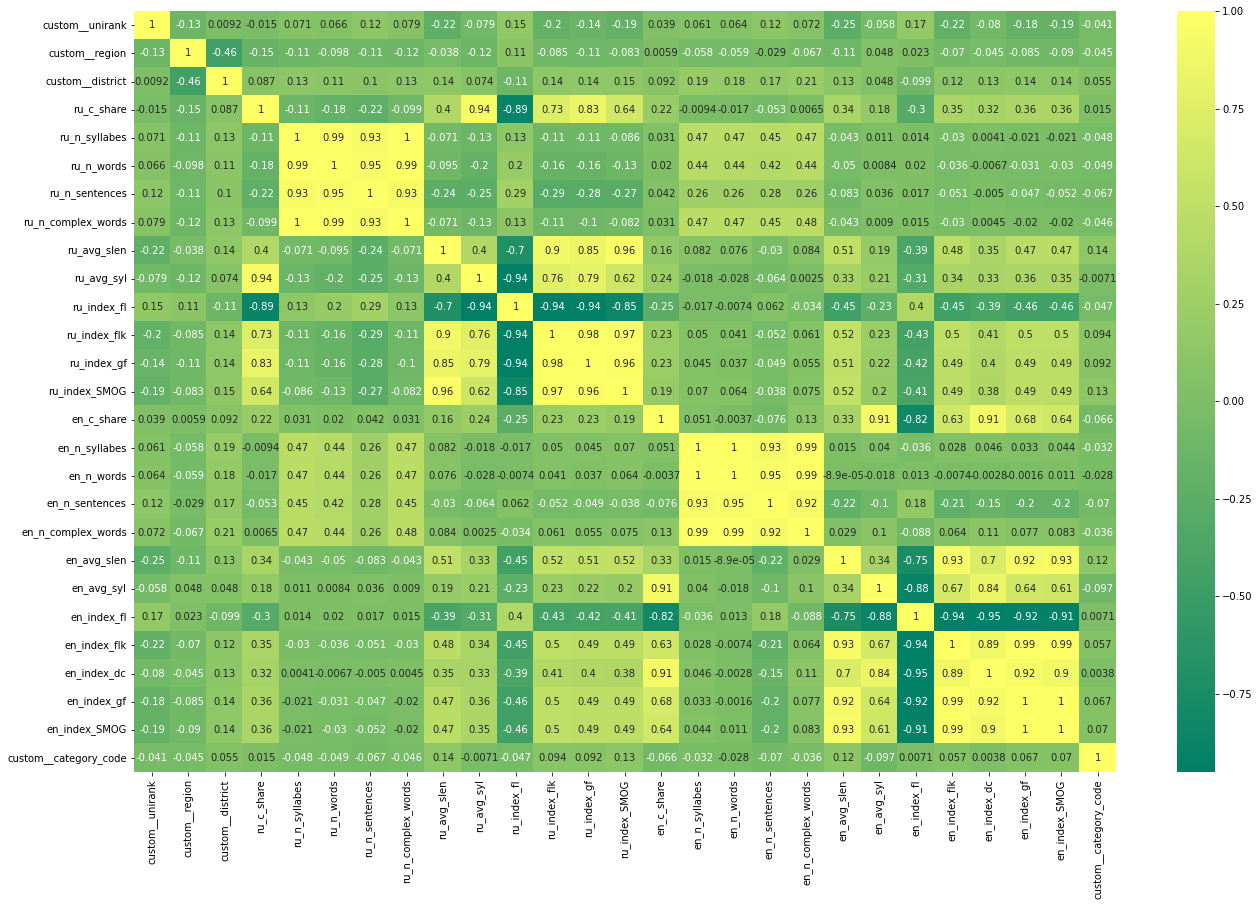

In [45]:
# creating heatmap
plt.figure(figsize=(22,14))
sns.heatmap(df_ru[numeric_cols].corr(method='pearson'), annot=True, cmap='summer')
plt.show()

Метрики характеристик текстов коррелируют, это показывает, что взяты схожие тексты. 
Полученные значения индексов всех формул сильно коррелируют друг с другом. Индексы сложности русского текста показывают также корреляцию и с индексами английского текста.
Однако, индекс Флеша, адаптированный под русский язык в другом исследовании, в нашем случае, в отличие от оригинального индекса, часто давал отрицательные значения, что его нельзя сопоставить со шкалой сложности текста. Скорее всего, текста на которых настраивался индекс, сильно отличаются от исследуемых здесь. Также на индекс Флеша негативно влияет наличие длинных списков (что является большим предложением), а так же небольшой объем текста.
Однако, адаптированная формула Флеша-Канкейда показывала всегда значения, достаточно близкие к текстам на английском. Индекс SMOG для русского языка в среднем показывает результаты на 5 лет больше, чем для английского, что не показывает хорошую адаптированность. Индекс Fog так же разнится с английским значениями, на русском языке значения уровня читабельности в 1.5 раза больше и не входят в возможный диапазон значений.
Наибольшую связь с округом сайта показало количество сложных слов в тексте, преимущественно в английском. Наибольшая связь с категорией направленности обучения - показывает средняя длина предложения.

In [46]:
max_rows = pd.get_option('display.max_rows')
pd.set_option('display.max_rows', None)
df_tmp = df_ru.groupby(['custom__district'])['ru_index_fl'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
for idx, val in df_tmp.iterrows():
  df_tmp.loc[idx, 'name'] = okruga[idx]
display(df_tmp)
pd.set_option('display.max_rows', max_rows)

,mean,count,name
custom__district,,,
1,7.311472,47,Центральный федеральный округ
6,5.582205,18,Сибирский федеральный округ
2,1.269843,18,Северо-Западный федеральный округ
7,0.655714,7,Дальневосточный федеральный округ
5,0.615300,8,Уральский федеральный округ
4,-5.259573,21,Приволжский федеральный округ
3,-9.823858,7,Южный федеральный округ
8,-14.718662,2,Северо-Кавказский федеральный округ


In [47]:
max_rows = pd.get_option('display.max_rows')
pd.set_option('display.max_rows', None)
df_tmp = df_ru.groupby(['custom__district'])['ru_index_flk'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
for idx, val in df_tmp.iterrows():
  df_tmp.loc[idx, 'name'] = okruga[idx]
display(df_tmp)
pd.set_option('display.max_rows', max_rows)

,mean,count,name
custom__district,,,
8,19.577656,2,Северо-Кавказский федеральный округ
3,17.656616,7,Южный федеральный округ
4,16.073135,21,Приволжский федеральный округ
5,15.776597,8,Уральский федеральный округ
2,15.285915,18,Северо-Западный федеральный округ
6,15.081457,18,Сибирский федеральный округ
7,14.694327,7,Дальневосточный федеральный округ
1,13.978435,47,Центральный федеральный округ


In [48]:
max_rows = pd.get_option('display.max_rows')
pd.set_option('display.max_rows', None)
df_tmp = df_ru.groupby(['custom__district'])['ru_index_gf'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
for idx, val in df_tmp.iterrows():
  df_tmp.loc[idx, 'name'] = okruga[idx]
display(df_tmp)
pd.set_option('display.max_rows', max_rows)

,mean,count,name
custom__district,,,
8,35.437241,2,Северо-Кавказский федеральный округ
3,33.684732,7,Южный федеральный округ
4,32.232981,21,Приволжский федеральный округ
5,31.629952,8,Уральский федеральный округ
6,31.316724,18,Сибирский федеральный округ
2,31.118915,18,Северо-Западный федеральный округ
7,30.738790,7,Дальневосточный федеральный округ
1,30.199747,47,Центральный федеральный округ


In [49]:
max_rows = pd.get_option('display.max_rows')
pd.set_option('display.max_rows', None)
df_tmp = df_ru.groupby(['custom__district'])['ru_index_SMOG'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
for idx, val in df_tmp.iterrows():
  df_tmp.loc[idx, 'name'] = okruga[idx]
display(df_tmp)
pd.set_option('display.max_rows', max_rows)

,mean,count,name
custom__district,,,
8,26.628015,2,Северо-Кавказский федеральный округ
3,24.617479,7,Южный федеральный округ
5,23.208428,8,Уральский федеральный округ
4,23.142226,21,Приволжский федеральный округ
6,22.880586,18,Сибирский федеральный округ
2,22.723986,18,Северо-Западный федеральный округ
7,21.833794,7,Дальневосточный федеральный округ
1,21.694808,47,Центральный федеральный округ


На основе полученных данных, исходя из достаточно стабильно работающего индекса Флеша-Канкега, и распределенных по регионам, Центральный, Дальневосточный округа имеют самое удобочитаемое содержимое на русском языке. Для английского языка, исходя из всех индексов, лучшие - это Центральный, Дальневосточный и Северо-Западный округа, худшие - Приволжский, Южный, Северо-Кавказский округа. Но здесь нужно отметить, что они имеют сравнительно меньший объем исследованных сайтов.

In [ ]:
max_rows = pd.get_option('display.max_rows')
pd.set_option('display.max_rows', None)
df_tmp = df_ru.groupby(['custom__district'])['en_index_fl'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
for idx, val in df_tmp.iterrows():
  df_tmp.loc[idx, 'name'] = okruga[idx]
display(df_tmp)
pd.set_option('display.max_rows', max_rows)

,mean,count,name
custom__district,,,
7,26.371906,2,Дальневосточный федеральный округ
2,21.510946,4,Северо-Западный федеральный округ
4,13.222476,3,Приволжский федеральный округ
6,12.668143,8,Сибирский федеральный округ
1,12.295872,19,Центральный федеральный округ
5,5.358107,3,Уральский федеральный округ
3,4.373644,1,Южный федеральный округ


In [50]:
max_rows = pd.get_option('display.max_rows')
pd.set_option('display.max_rows', None)
df_tmp = df_ru.groupby(['custom__district'])['en_index_flk'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
for idx, val in df_tmp.iterrows():
  df_tmp.loc[idx, 'name'] = okruga[idx]
display(df_tmp)
pd.set_option('display.max_rows', max_rows)

,mean,count,name
custom__district,,,
8,17.794803,2,Северо-Кавказский федеральный округ
4,17.783127,21,Приволжский федеральный округ
6,17.274417,18,Сибирский федеральный округ
3,16.970014,7,Южный федеральный округ
5,16.894995,8,Уральский федеральный округ
7,16.269689,7,Дальневосточный федеральный округ
1,16.227260,47,Центральный федеральный округ
2,15.696242,18,Северо-Западный федеральный округ


In [51]:
max_rows = pd.get_option('display.max_rows')
pd.set_option('display.max_rows', None)
df_tmp = df_ru.groupby(['custom__district'])['en_index_gf'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
for idx, val in df_tmp.iterrows():
  df_tmp.loc[idx, 'name'] = okruga[idx]
display(df_tmp)
pd.set_option('display.max_rows', max_rows)

,mean,count,name
custom__district,,,
4,21.905256,21,Приволжский федеральный округ
8,21.754359,2,Северо-Кавказский федеральный округ
6,21.042739,18,Сибирский федеральный округ
5,20.601323,8,Уральский федеральный округ
3,20.334214,7,Южный федеральный округ
7,19.918682,7,Дальневосточный федеральный округ
1,19.805432,47,Центральный федеральный округ
2,19.469864,18,Северо-Западный федеральный округ


In [52]:
max_rows = pd.get_option('display.max_rows')
pd.set_option('display.max_rows', None)
df_tmp = df_ru.groupby(['custom__district'])['en_index_SMOG'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
for idx, val in df_tmp.iterrows():
  df_tmp.loc[idx, 'name'] = okruga[idx]
display(df_tmp)
pd.set_option('display.max_rows', max_rows)

,mean,count,name
custom__district,,,
8,18.607457,2,Северо-Кавказский федеральный округ
4,18.471911,21,Приволжский федеральный округ
6,17.945413,18,Сибирский федеральный округ
3,17.475223,7,Южный федеральный округ
5,17.468221,8,Уральский федеральный округ
7,17.189712,7,Дальневосточный федеральный округ
1,17.073947,47,Центральный федеральный округ
2,16.728753,18,Северо-Западный федеральный округ
